In [126]:
import pandas as pd
import plotly.express as px
from itertools import cycle
import plotly.graph_objects as go

In [104]:
df = pd.read_csv('data.csv')
df = df.iloc[1:]
# df["StringencyIndex"] = df["StringencyIndex"].round(decimals=1)
df_str = df.groupby("StringencyIndex").mean()
df_str = df_str.reset_index()

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (2,3,5,40) have mixed types.Specify dtype option on import or set low_memory=False.



In [105]:
df_str = df_str[df_str["StringencyIndex"] > 0]
df_str = df_str[df_str["ConfirmedCases"] > 0]
df_str = df_str[df_str["ConfirmedDeaths"] < 70000]

In [129]:
fig = px.scatter(x=df_str["StringencyIndex"], y=df_str["ConfirmedCases"], log_y=True, trendline="lowess", 
                 color=df_str["ConfirmedDeaths"],
                color_continuous_scale='blugrn',
                )
palette = cycle(px.colors.qualitative.G10)

# Add figure title
fig.update_layout(
    title_text="Number of Confirmed Cases against Stringency Index"
)

fig.update_yaxes(title_text="Confirmed Cases (logarithmic)")

# Set y-axes titles
fig.update_xaxes(title_text="<b>Stringency Index</b>")
fig.update_layout(template="none")

fig.update_layout(
    autosize=True,
    width=700,
    height=500,
    )
fig.layout.font.family = 'Arial'
fig.data[1].update(line_color='grey') 
fig.show()

In [130]:
df.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDispla

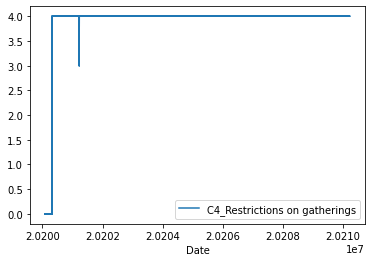

In [134]:
dfc = df[df["CountryName"] == "United Kingdom"]
dfc.plot(x="Date", y="C4_Restrictions on gatherings")